In [1]:
%run -i ch04.py

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')

from models import LinearRegressionModel

In [3]:
theta = [4, 3]
count = 100
X, y = generate_data(theta, count)

In [4]:
theta = linear_fit(X, y)
theta

array([[4.2151],
       [2.7701]])

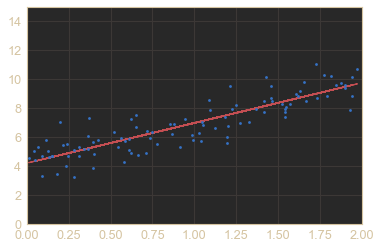

In [5]:
y_ = linear_predict(X, theta)
plt.plot(X, y_, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
lr = LinearRegressionModel(LinearRegression)
lr.evaluate(*(X, y))
print(repr(lr))

<models.LinearRegressionModel object at 0x114778da0>: LinearRegression,
size: 100, rmse: 0.90, mean: 0.90, std: 0.19,
theta: [4.2151, 2.7701], residuals: [80.6585], sigmas: [14.3702, 4.1196]


/Users/kintisheff/code/ml/models.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta, residuals, rank, sigmas = np.linalg.lstsq(X_, y)
